### 데이터 로드
---

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/naver_shopping.txt", filename="naver_shopping.txt")

In [2]:
total_data = pd.read_table('naver_shopping.txt', names=['ratings', 'reviews'])
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 200000


In [3]:
total_data[:5]

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [4]:
total_data['ratings'].value_counts()

ratings
5    81177
2    63989
1    36048
4    18786
Name: count, dtype: int64

In [5]:
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)
total_data

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
...,...,...,...
199995,2,장마라그런가!!! 달지않아요,0
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,1
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요,1
199998,5,넘이쁘고 쎄련되보이네요~,1


#### np.select() 사용 방법

In [6]:
import pandas as pd

# 예시 데이터 프레임 생성
data = {'국어': {'가': 86, '나': 79, '다': 93, '라': 80}, 
        '영어': {'가': 90, '나': 10, '다': 50, '라': 95}}
df = pd.DataFrame(data)

cond1 = df['국어'] >= 80
cond2 = df['영어'] >= 80

np.where(cond1 & cond2, '수', np.where(cond1 | cond2, '우', '미'))

df['학생평가'] = np.select([cond1 & cond2, cond1 | cond2], ['수', '우'], '미')

df

,국어,영어,학생평가
가,86,90,수
나,79,10,미
다,93,50,우
라,80,95,수


### 중복 확인(reviews) 및 중복 제거
---

In [7]:
len(total_data), total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique(), 

(200000, 4, 199908, 2)

In [8]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)
print(f'총 샘플의 수 : {len(total_data)}')

총 샘플의 수 : 199908


### Null 확인

In [9]:
total_data.isnull().values.any()

np.False_

In [10]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199908 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  199908 non-null  int64 
 1   reviews  199908 non-null  object
 2   label    199908 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [11]:
total_data.describe()

,ratings,label
count,199908.000000,199908.000000
mean,3.225909,0.499995
std,1.645431,0.500001
min,1.000000,0.000000
25%,2.000000,0.000000
50%,2.000000,0.000000
75%,5.000000,1.000000
max,5.000000,1.000000


### 훈련 데이터와 테스트 데이터를 3:1 비율로 분리

In [12]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(total_data, test_size=0.25, random_state = 42)
print(f'total_data 리뷰의 개수: {len(total_data)}')
print(f'훈련용 리뷰의 개수: {len(train_data)}')
print(f'테스트용 리뷰의 개수: {len(test_data)}')
print(f'훈련용 + 테스트용  리뷰의 개수: {len(train_data) + len(test_data)}')


total_data 리뷰의 개수: 199908
훈련용 리뷰의 개수: 149931
테스트용 리뷰의 개수: 49977
훈련용 + 테스트용  리뷰의 개수: 199908


In [13]:
train_data.head()

,ratings,reviews,label
59666,2,사이즈를 3센치씩 늘린건데도 작아요 그리고 색상은 완전 달라요 칙칙한핑크네요ㅠㅠ 많...,0
12433,2,ㅂ불만족.. 빗이 아픔 .. 멍이피부에 빗질못해주겟네요,0
146516,1,이 제품쓰고 삼일만에 변기물이 잘 안내려갔어요. 혹시나해서 다시 빼보니 물이 다시 ...,0
158109,5,적당하고 만족합니다,1
70219,2,편하자고 이용하는 밀키튼데 손 은근 많이 가서 저는 패쓰요,0


<Axes: xlabel='label'>

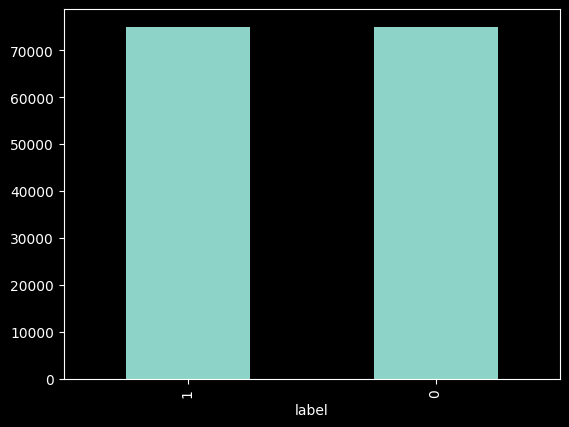

In [14]:
train_data['label'].value_counts().plot(kind='bar')

In [15]:
print(train_data.groupby('label').size().reset_index(name='count'))

   label  count
0      0  74918
1      1  75013


## 실습

### Huggingface.co 에서 모델 찾고 예제 실행
---

In [16]:
from transformers import pipeline

classifier = pipeline("text-classification", model="matthewburke/korean_sentiment")
custom_tweet = "영화 재밌다."

preds = classifier(custom_tweet, return_all_scores=True)
# preds = classifier(custom_tweet, top_k=None)

is_positive = preds[0][1]['score'] > 0.5

print(f"스코어 점수 확인 : {preds[0][1]['score']}")
print(f"긍정 여부 : {is_positive}")


pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/396k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/788k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use mps:0
/opt/anaconda3/envs/fc_fine_tune/lib/python3.11/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


스코어 점수 확인 : 0.9731518626213074
긍정 여부 : True


### GPU 테스트
---

In [17]:
import torch

def check_mps_availability():
    # MPS 사용 가능 여부를 확인합니다.
    if torch.backends.mps.is_available():
        print("이 장치에서 MPS(GPU 가속)를 사용할 수 있습니다.")
    else:
        print("MPS를 사용할 수 없습니다. CPU를 사용합니다.")

#  GPU 사용 가능 여부를 확인합니다.
check_mps_availability()

이 장치에서 MPS(GPU 가속)를 사용할 수 있습니다.


In [18]:
test_data.head()

,ratings,reviews,label
193242,1,너무 낮고 솜도 적고 실망스럽습니다,0
125080,1,피부에 뾰루지가 많이 올라와요,0
122750,5,배송도 빠르네요 가격대비 좋은것 같아요~~~ 첨에는 힘들어하나 조금 지나니 잘 하네요,1
72927,5,재구매입니다. 핏도 좋고 착용감도 좋습니다.,1
83890,1,파손제품 온거 출장같다 오늘 받았는데 현재상황 장난하시는지 택배회사 항의하세요,0


In [19]:
def pred_sentiment(text):
  preds = classifier(text, return_all_scores=True)
  if preds[0][1]['score'] > 0.5:
    return 1
  else:
    return 0

In [20]:
pred_sentiment('피부에 뾰루지가 많이 올라와요')

/opt/anaconda3/envs/fc_fine_tune/lib/python3.11/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


0

In [21]:
from tqdm import tqdm
tqdm.pandas()

In [22]:
# 테스트 데이터 중 상위 1,000개만 복사
test_data_for_sample = test_data[:1000].copy()

In [23]:
test_data_for_sample['pred'] = test_data_for_sample['reviews'].progress_apply(pred_sentiment)

  0%|          | 0/1000 [00:00<?, ?it/s]/opt/anaconda3/envs/fc_fine_tune/lib/python3.11/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
100%|██████████| 1000/1000 [00:19<00:00, 52.21it/s]


In [24]:
test_data_for_sample.head()

,ratings,reviews,label,pred
193242,1,너무 낮고 솜도 적고 실망스럽습니다,0,0
125080,1,피부에 뾰루지가 많이 올라와요,0,0
122750,5,배송도 빠르네요 가격대비 좋은것 같아요~~~ 첨에는 힘들어하나 조금 지나니 잘 하네요,1,1
72927,5,재구매입니다. 핏도 좋고 착용감도 좋습니다.,1,1
83890,1,파손제품 온거 출장같다 오늘 받았는데 현재상황 장난하시는지 택배회사 항의하세요,0,0


In [25]:
# 정확도 계산 함수
def compute_accuracy(df):
    correct = (df['pred'] == df['label']).sum()
    total = len(df)
    return correct / total

In [26]:
acc = compute_accuracy(test_data_for_sample)
print('정확도(%):', acc * 100)

정확도(%): 87.6


### 텍스트 요약기
---

In [29]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained('eenzeenee/t5-base-korean-summarization')
tokenizer = AutoTokenizer.from_pretrained('eenzeenee/t5-base-korean-summarization')

prefix = "summarize: "
sample = """
    안녕하세요? 우리 (2학년)/(이 학년) 친구들 우리 친구들 학교에 가서 진짜 (2학년)/(이 학년) 이 되고 싶었는데 학교에 못 가고 있어서 답답하죠? 
    그래도 우리 친구들의 안전과 건강이 최우선이니까요 오늘부터 선생님이랑 매일 매일 국어 여행을 떠나보도록 해요. 
    어/ 시간이 벌써 이렇게 됐나요? 늦었어요. 늦었어요. 빨리 국어 여행을 떠나야 돼요. 
    그런데 어/ 국어여행을 떠나기 전에 우리가 준비물을 챙겨야 되겠죠? 국어 여행을 떠날 준비물, 교안을 어떻게 받을 수 있는지 선생님이 설명을 해줄게요. 
    (EBS)/(이비에스) 초등을 검색해서 들어가면요 첫화면이 이렇게 나와요. 
    자/ 그러면요 여기 (X)/(엑스) 눌러주(고요)/(구요). 저기 (동그라미)/(똥그라미) (EBS)/(이비에스) (2주)/(이 주) 라이브특강이라고 되어있죠? 
    거기를 바로 가기를 누릅니다. 자/ (누르면요)/(눌르면요). 어떻게 되냐? b/ 밑으로 내려요 내려요 내려요 쭉 내려요. 
    우리 몇 학년이죠? 아/ (2학년)/(이 학년) 이죠 (2학년)/(이 학년)의 무슨 과목? 국어. 
    이번주는 (1주)/(일 주) 차니까요 여기 교안. 다음주는 여기서 다운을 받으면 돼요. 
    이 교안을 클릭을 하면, 짜잔/. 이렇게 교재가 나옵니다 .이 교안을 (다운)/(따운)받아서 우리 국어여행을 떠날 수가 있어요. 
    그럼 우리 진짜로 국어 여행을 한번 떠나보도록 해요? 국어여행 출발. 자/ (1단원)/(일 단원) 제목이 뭔가요? 한번 찾아봐요. 
    시를 즐겨요 에요. 그냥 시를 읽어요 가 아니에요. 시를 즐겨야 돼요 즐겨야 돼. 어떻게 즐길까? 일단은 내내 시를 즐기는 방법에 대해서 공부를 할 건데요. 
    그럼 오늘은요 어떻게 즐길까요? 오늘 공부할 내용은요 시를 여러 가지 방법으로 읽기를 공부할겁니다. 
    어떻게 여러가지 방법으로 읽을까 우리 공부해 보도록 해요. 오늘의 시 나와라 짜잔/! 시가 나왔습니다 시의 제목이 뭔가요? 다툰 날이에요 다툰 날. 
    누구랑 다퉜나 동생이랑 다퉜나 언니랑 친구랑? 누구랑 다퉜는지 선생님이 시를 읽어 줄 테니까 한번 생각을 해보도록 해요."""

inputs = [prefix + sample]


inputs = tokenizer(inputs, max_length=512, truncation=True, return_tensors="pt")
output = model.generate(**inputs, num_beams=3, do_sample=True, min_length=10, max_length=64)
decoded_output = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
result = nltk.sent_tokenize(decoded_output.strip())[0]

print('RESULT >>', result)

[nltk_data] Downloading package punkt to /Users/netager/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/netager/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


RESULT >> 국어 여행을 떠나기 전에 국어 여행을 떠날 준비물과 교안을 어떻게 받을 수 있는지 선생님이 설명해 준다.


In [30]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained('eenzeenee/t5-base-korean-summarization')
tokenizer = AutoTokenizer.from_pretrained('eenzeenee/t5-base-korean-summarization')

def summarize(sample):
  prefix = "summarize: "
  inputs = [prefix + sample]
  inputs = tokenizer(inputs, max_length=512, truncation=True, return_tensors="pt")
  output = model.generate(**inputs, num_beams=3, do_sample=True, min_length=10, max_length=64)
  decoded_output = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
  result = nltk.sent_tokenize(decoded_output.strip())[0]
  return result

[nltk_data] Downloading package punkt to /Users/netager/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/netager/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [31]:
text = '''배우 배수지가 매니지먼트 숲과 전속계약을 체결했다. 수지는 8일 자신의 인스타그램에 '데뷔 때 부터 함께해온 소속사 JYP와 계약기간을 마치고 오늘부터 새로운 소속사 매니지먼트 숲과 함께 하게 되었다'고 밝혔다. 이어 수지는 '연습생으로 시작해서, 데뷔하고 9년의 시간이 흐른 지금까지, JYP와 함께했던 여러 영광의 순간들이 스쳐지나간다'면서 '9년 동안 항상 옆에서 서포트 해주셨던 JYP 모든 직원분들께 진심으로 감사드린다'고 인사를 잊지 않았다. 2010년 걸그룹 '미쓰에이'로 데뷔한 배수지는 2011년 KBS2 드라마 '드림하이'로 첫 연기 활동을 시작했다. 2012년 영화 '건축학개론'을 통해 스크린 데뷔를 한 뒤 가수 활동과 연기 활동을 꾸준히 병행해 오고 있다. 매니지먼트 숲 관계자는 '배우 배수지의 장점과 매력을 극대화할 수 있는 작품 선택부터 국내외 활동, 가수로서의 솔로 활동까지 활발하게 이루어질 수 있도록 지원할 예정이다'고 전했다. 특히 올해는 작품을 통해 연기자 배수지로 대중들과 만날 예정이다. 현재 촬영 중인 SBS 드라마 '배가본드'는 민항 여객기 추락 사고에 연루된 한 남자가 은폐된 진실 속에서 찾아낸 거대한 국가 비리를 파헤치게 되는 과정을 담은 이야기다. 배수지는 국정원 블랙요원 고해리 역으로 출연하며, 뒤이어 영화 '백두산'에도 합류한다. 매니지먼트 숲은 공유, 공효진, 김재욱, 서현진, 이천희, 전도연, 정유미, 남지현, 최우식, 유민규, 이재준, 정가람, 전소니 등 소속되어 있다.'''
result = summarize(text)
print(result)

배우 수지는 소속사 JYP와 계약기간을 마치고 새로운 소속사 매니지먼트 숲과 전속계약을 체결했다.
